<a href="https://colab.research.google.com/github/skripted/upg_lendingclub_casestudy/blob/main/LC_Santosh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending Club Case Study

### Group
    Vigneshwar
    Santosh Kumar Ramarathnam

## Initializing and reading through data

First step is to do basic loading of data and reviewing through what the data looks like. We have 111 columns describing loan data through the time period 2007 to 2011. 

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')

In [4]:
loandata = pd.read_csv('/content/drive/My Drive/lendingclub/loan.csv',encoding = "ISO-8859-1", low_memory=False)

loandata.shape

(39717, 111)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
loandata.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
# Configure / set display options
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

## Cleaning the data

Second step, is for us to clean the data: 
1. Assess columns that we will use for our analysis
2. Looking for missing values and identifying replacements
3. Clean data type and adjust value precision (currency, date formats,rate percentages)
4. Create Useful derived columns

In [8]:
missingdataincolumns = round(100*(loandata.isnull().sum()/len(loandata.id)),2)
missingdataincolumns.loc[missingdataincolumns > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

Let's remove the columns with majority of the data missing (51%) as they would not be useful in our analysis.

In [9]:
cols_missingdata = list(missingdataincolumns[missingdataincolumns >=51].index)
len(cols_missingdata)

57

Dropping these 57 columns will clear the noise. 

In [10]:
loandata = loandata.drop(cols_missingdata,axis=1)
loandata.shape

(39717, 54)

In [11]:
missingdataincolumns = round(100*(loandata.isnull().sum()/len(loandata.id)),2)
missingdataincolumns[missingdataincolumns!=0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [12]:
#dropping the desc column since more usable information is captured in other columns
loandata = loandata.drop('desc',axis=1)

In [13]:
loandata.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


Let's review the other columns that have missing data

In [15]:
print("unique emp_title : %d"  % len(loandata.emp_title.unique()))
print("unique emp_length : %d"  % len(loandata.emp_length.unique()))
print("unique title : %d"  % len(loandata.title.unique()))
print("unique revol_util : %d"  % len(loandata.revol_util.unique()))
print("unique last_pymnt_d : %d"  % len(loandata.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loandata.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loandata.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loandata.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loandata.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loandata.tax_liens.unique()))

unique emp_title : 28821
unique emp_length : 12
unique title : 19616
unique revol_util : 1090
unique last_pymnt_d : 102
unique last_credit_pull_d : 107
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


Let's review those columns that have single digit unique values and assess if they are useful at all for our analysis.

In [16]:
loandata.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [17]:
loandata.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [18]:
loandata.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [19]:
loandata.tax_liens.unique()

array([ 0., nan])

It's clear that those columns with 0 or NaN values aren't going to be much useful. 

In [20]:
#dropping those columns with 0 or NaN values
dropcols = ['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens']
loandata = loandata.drop(dropcols,axis=1)

In [21]:
loandata.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.0,39717.0,39717.0,39020.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,1.0,0.0,0.0,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,1.0,0.0,0.0,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,1.0,0.0,0.0,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,1.0,0.0,0.0,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,0.0,0.0,2.000000


In [22]:
loandata.shape

(39717, 50)

We still need to review pub_rec_bankruptcies column further.

In [31]:
loandata.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [32]:
loandata['pub_rec_bankruptcies'].isnull().sum()

697

There are 697 rows where pub_rec_bankruptcies are null, this represents about 1.7% of the total number of rows and we will just drop those rows.

In [46]:
loandata = loandata[-loandata.pub_rec_bankruptcies.isnull()]

In [47]:
loandata.shape

(39020, 50)

In [48]:
missingdataincolumns = round(100*(loandata.isnull().sum()/len(loandata.id)),2)
missingdataincolumns[missingdataincolumns!=0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [51]:
loandata.emp_title.nunique()

28344

72% of the values in emp_title column is unique - and therefore isn't much use in our analysis. We will drop that column. 

In [52]:
loandata = loandata.drop('emp_title',axis=1)

Let's look at emp_length, title, revol_util, last_pymnt_d columns with missing data. Since the % rows are limited we will simply ignore those rows. 

In [53]:
loandata = loandata[-loandata.emp_length.isnull()]
loandata = loandata[-loandata.title.isnull()]
loandata = loandata[-loandata.revol_util.isnull()]
loandata = loandata[-loandata.last_pymnt_d.isnull()]

In [54]:
loandata.shape

(37826, 49)

In [55]:
missingdataincolumns = round(100*(loandata.isnull().sum()/len(loandata.id)),2)
missingdataincolumns[missingdataincolumns!=0]

Series([], dtype: float64)

There is no more missing data in the dataframe. Let's now look at columns that's useless because they are the same value across the entire dataframe.

In [56]:
loandata.nunique().sort_values()

initial_list_status            1
pymnt_plan                     1
policy_code                    1
delinq_amnt                    1
application_type               1
acc_now_delinq                 1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     81
last_pymnt_d                  97
last_credit_pull_d            97
int_rate                     337
earliest_cr_line             514
zip_code                     809
loan_amnt                    869
funded_amnt                 1031
revol_util                  1087
out_prncp 

There are two sets of columns that can be further dropped. Those that have 1 value across the dataframe and those that have unique values for each row. url, member_id and id are columns with entirely unique values. We will drop url and member_id. We will keep the id column in case we need it in the future. initial_list_status, pymnt_plan, policy_code, delinq_amnt, application_type, acc_now_delinq are useless because they have just one value across the entire data set.

In [57]:
dropcols = ['member_id','url','initial_list_status', 'pymnt_plan', 'policy_code', 'delinq_amnt', 'application_type', 'acc_now_delinq']
loandata = loandata.drop(dropcols,axis=1)

In [58]:
loandata.shape

(37826, 41)

In [59]:
loandata.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


Let's take a look at all the currency amount and standardize format.

In [61]:
loandata.loan_amnt.value_counts().tail()

19725    1
19550    1
22875    1
8175     1
23575    1
Name: loan_amnt, dtype: int64

In [62]:
loandata.funded_amnt.value_counts().tail()

21425    1
26300    1
25150    1
27750    1
725      1
Name: funded_amnt, dtype: int64

In [63]:
loandata.funded_amnt_inv.value_counts().tail()

13743.698460    1
7993.631739     1
16545.291260    1
18069.055090    1
525.000000      1
Name: funded_amnt_inv, dtype: int64

In [65]:
# total_pymnt	total_pymnt_inv	total_rec_prncp	total_rec_int	total_rec_late_fee	recoveries	collection_recovery_fee
loandata.total_pymnt.value_counts().tail()

12993.946870    1
52956.260000    1
3612.068565     1
2180.090000     1
3579.662273     1
Name: total_pymnt, dtype: int64

In [66]:
loandata.total_pymnt_inv.value_counts().tail()

2180.09     1
8306.56     1
4668.68     1
19884.28    1
626.44      1
Name: total_pymnt_inv, dtype: int64

In [67]:
loandata.total_rec_prncp.value_counts().tail()

3325.28     1
9192.73     1
2575.27     1
19174.44    1
8688.59     1
Name: total_rec_prncp, dtype: int64

In [68]:
loandata.total_rec_int.value_counts().tail()


67.87       1
10453.68    1
1662.43     1
2923.11     1
579.66      1
Name: total_rec_int, dtype: int64

In [69]:
loandata.total_rec_late_fee.value_counts().tail()

25.530000    1
14.987132    1
14.939392    1
23.960000    1
52.262227    1
Name: total_rec_late_fee, dtype: int64

In [70]:
loandata.recoveries.value_counts().tail()

329.77    1
224.00    1
608.44    1
11.07     1
304.20    1
Name: recoveries, dtype: int64

In [71]:
loandata.collection_recovery_fee.value_counts().tail()

408.1176    1
4.0957      1
16.5800     1
250.6104    1
668.3600    1
Name: collection_recovery_fee, dtype: int64

From the above funded_amnt_inv, total_pymnt, total_rec_late_fee, collection_recovery_fee need to be adjusted.

In [72]:
loandata.funded_amnt_inv = round(loandata.funded_amnt_inv,2)
loandata.total_pymnt =round(loandata.total_pymnt,2)
loandata.total_rec_late_fee = round(loandata.total_rec_late_fee,2)
loandata.collection_recovery_fee = round(loandata.collection_recovery_fee,2)

Next is to look at those columns with date/month info and the corresponding datatype in the dataframe.

In [73]:
loandata.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


There are 4 columns - 
1. issue_d
2. earliest_cr_line
3. last_pymnt_d
4. last_credit_pull_d

In [74]:
monthcols = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loandata[monthcols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37826 entries, 0 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             37826 non-null  object
 1   earliest_cr_line    37826 non-null  object
 2   last_pymnt_d        37826 non-null  object
 3   last_credit_pull_d  37825 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


Converting these datatypes from object to datetime

In [76]:
loandata.issue_d = pd.to_datetime(loandata.issue_d, format='%b-%y')
loandata.earliest_cr_line = pd.to_datetime(loandata.earliest_cr_line, format='%b-%y')
loandata.last_pymnt_d = pd.to_datetime(loandata.last_pymnt_d, format='%b-%y')
loandata.last_credit_pull_d = pd.to_datetime(loandata.last_credit_pull_d, format='%b-%y')

In [77]:
loandata[monthcols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37826 entries, 0 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             37826 non-null  datetime64[ns]
 1   earliest_cr_line    37826 non-null  datetime64[ns]
 2   last_pymnt_d        37826 non-null  datetime64[ns]
 3   last_credit_pull_d  37825 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


In [78]:
loandata.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0


The columns int_rate can be modified to remove the % symbol and the column term can be modified to remove the "months". Let's review these before making the changes.

In [80]:
loandata.term.value_counts()

 36 months    27492
 60 months    10334
Name: term, dtype: int64

In [81]:
loandata['term'] = loandata.term.apply(lambda x:x.split()[0])

In [82]:
loandata.term.value_counts()

36    27492
60    10334
Name: term, dtype: int64

In [83]:
loandata['int_rate'] = loandata['int_rate'].str.strip('%').astype('float')
# also applying this to revol_util since it's similar column
loandata['revol_util'] = loandata['revol_util'].str.strip('%').astype('float')

Now let's refocus on our month columns. It has two useful pieces of info - month and year. We will create derived columns from issue_d. Other month columns aren't as useful to be split up.

In [84]:
loandata['issue_d_mon'] = loandata['issue_d'].dt.month
loandata['issue_d_year'] = loandata['issue_d'].dt.year

In [85]:
loandata.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_mon,issue_d_year
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,12,2011
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,12,2011
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,12,2011
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,12,2011
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,12,2011


In [86]:
loandata.groupby('issue_d_year').id.count()

issue_d_year
2007        7
2008     1104
2009     4687
2010    11171
2011    20857
Name: id, dtype: int64

In [87]:
loandata.to_csv('/content/drive/My Drive/lendingclub/procsd_loandata.csv', encoding='utf-8', index=False)

## Analyze Data

Now that we have reasonably cleaned data, it is time for us to start analyzing the data we have. 
We will start with univariate and segmented univariate analysis. 

In [88]:
ploandata = loandata[:]
# can also read from earlier loaded file.

Let's start with basics ... 
1. How many loans were issued on which year.
2. What's the loan status for these loans.

In [89]:
ploandata.groupby('issue_d_year').id.count()

issue_d_year
2007        7
2008     1104
2009     4687
2010    11171
2011    20857
Name: id, dtype: int64

Progressively, we have increased loan issuance from 2007 to 2011. We have nearly doubled in 2011 (YoY increase) and nearly tripled in 2010 (YoY increase from 2009). 

In [90]:
ploandata.loan_status.value_counts()

Fully Paid     31525
Charged Off     5203
Current         1098
Name: loan_status, dtype: int64

36728 loans are either fully paid or charged off. About a 1100 loans are current. Current loans are difficult to analyze since their behavior could change one way or the other. We can simplify for now to exclude them from our analysis.

In [91]:
ploandata = ploandata[ploandata['loan_status'].isin(['Fully Paid','Charged Off'])]
ploandata.shape

(36728, 43)

Let's dive into loan status a little more. 

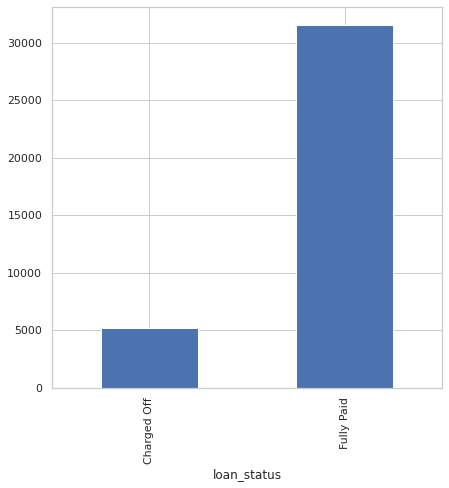

In [94]:
plt.figure(figsize=(7,7))
ax = ploandata.groupby('loan_status').id.count().plot.bar()
plt.show()

In [95]:
print("%.2f" % (ploandata.loc[ploandata['loan_status'] == 'Charged Off'].id.count() * 100/len(ploandata)))

14.17


14.2% of loans are written off. These are defaulted loans where recoveries where no longer possible and had to be written off.

In [96]:
ploandata.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_mon,issue_d_year
count,3.672800e+04,36728.000000,36728.000000,36728.000000,36728.000000,36728.000000,3.672800e+04,36728.000000,36728.000000,36728.000000,36728.000000,36728.00000,36728.000000,36728.000000,36728.0000,36728.0,36728.0,36728.000000,36728.000000,36728.000000,36728.000000,36728.000000,36728.000000,36728.000000,36728.000000,36728.000000,36728.000000,36728.000000
mean,6.834082e+05,11153.604879,10884.571716,10444.823852,11.979958,325.010043,6.947266e+04,13.337304,0.145992,0.868901,9.305680,0.05410,13386.557749,48.993567,22.1632,0.0,0.0,12020.443951,11544.794033,9766.969162,2154.728227,1.341139,97.405499,12.498923,2800.488227,0.041739,7.157836,2010.349679
std,2.014251e+05,7368.341242,7107.504810,7008.380075,3.701000,208.851223,6.406891e+04,6.649362,0.491416,1.067644,4.375788,0.23542,15857.237794,28.311869,11.4071,0.0,0.0,8849.525607,8705.688533,7034.297487,2411.916629,7.204977,700.507017,150.309503,4538.055024,0.200675,3.380886,0.815653
min,5.473400e+04,500.000000,500.000000,0.000000,5.420000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,2.0000,0.0,0.0,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000,1.000000,2007.000000
25%,5.173220e+05,5500.000000,5425.000000,5000.000000,8.940000,167.730000,4.120000e+04,8.220000,0.000000,0.000000,6.000000,0.00000,3735.000000,25.600000,14.0000,0.0,0.0,5590.347500,5292.522500,4639.832500,660.777500,0.000000,0.000000,0.000000,223.597500,0.000000,4.000000,2010.000000
50%,6.600525e+05,10000.000000,9600.000000,9000.000000,11.830000,280.345000,6.000000e+04,13.430000,0.000000,1.000000,9.000000,0.00000,8881.000000,49.500000,20.0000,0.0,0.0,9833.520000,9375.695000,8000.000000,1328.670000,0.000000,0.000000,0.000000,592.395000,0.000000,7.000000,2011.000000
75%,8.310992e+05,15000.000000,15000.000000,14355.332500,14.460000,429.450000,8.300000e+04,18.590000,0.000000,1.000000,12.000000,0.00000,17040.000000,72.500000,29.0000,0.0,0.0,16322.595000,15637.482500,13500.000000,2720.620000,0.000000,0.000000,0.000000,3554.677500,0.000000,10.000000,2011.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.00000,149588.000000,99.900000,90.0000,0.0,0.0,58563.680000,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000,12.000000,2011.000000


Let's now look at the loan_amnt applied for. 

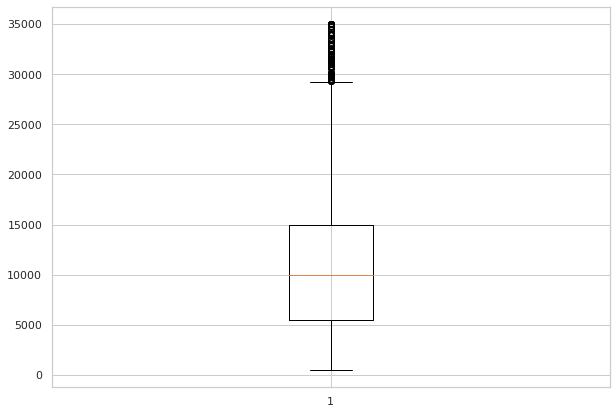

In [99]:
plt.figure(figsize=[10,7])
plt.boxplot(ploandata.loan_amnt)
plt.show()

In [101]:
ploandata['loan_amnt'].quantile(0.95)

25000.0

95% of the loans are either 25000 or less. The overall range 5500 to 15000. This also clearly shows there are outliers in the data. However these are not to be excluded. Now let's try to see the distribution between loan status and the loan amounts.

In [103]:
ploandata.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5203.0,12292.638862,8095.927677,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,31525.0,10965.614592,7224.125820,500.0,5500.0,9600.0,15000.0,35000.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

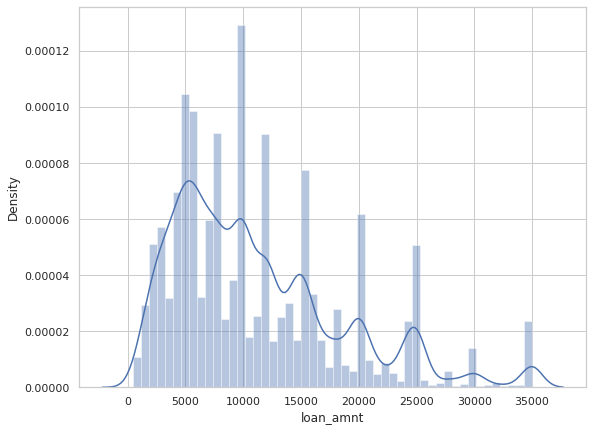

In [105]:
plt.figure(figsize=[20,7])
plt.subplot(1,2,1)
ax = sns.distplot(ploandata['loan_amnt'])
plt.show

This clearly shows a higher volume of loans in the 5000-10000 category. 
Let's now proceed to look at some of the categorical variables available for us to analyze.

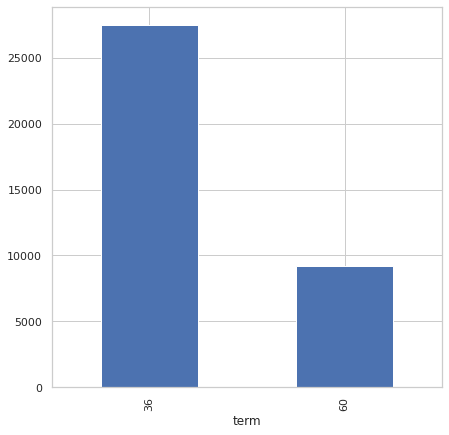

In [106]:
plt.figure(figsize=(7,7))
ax = ploandata.groupby('term').id.count().plot.bar()
plt.show()

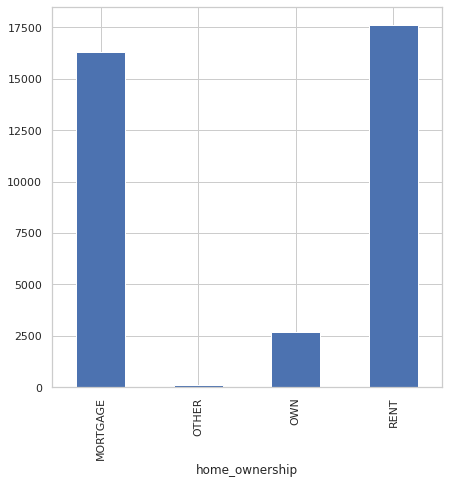

In [107]:
plt.figure(figsize=(7,7))
ax = ploandata.groupby('home_ownership').id.count().plot.bar()
plt.show()

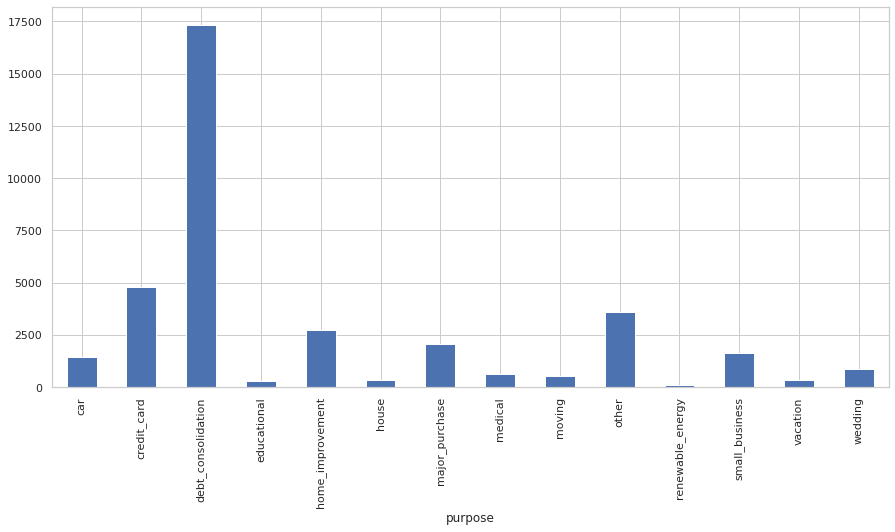

In [110]:
plt.figure(figsize=(15,7))
ax = ploandata.groupby('purpose').id.count().plot.bar()
plt.show()

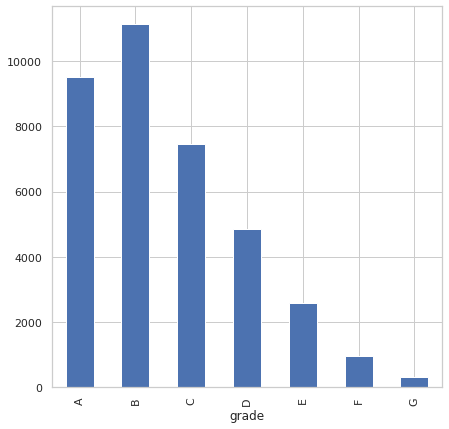

In [111]:
plt.figure(figsize=(7,7))
ax = ploandata.groupby('grade').id.count().plot.bar()
plt.show()

**Data Observations**

1. Higher proportion of 36 months loan term. 
2. Higher proportion of loans with higher grades (A, B) 
3. Higher proportion of loans for debt-consolidation purpose. Which in itself might be less favorable. Loan borrowers with debt consolidation reason usually shop around for lower interest rates. (Domain based insight).

Now let's look at the interest rates and how they trend.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

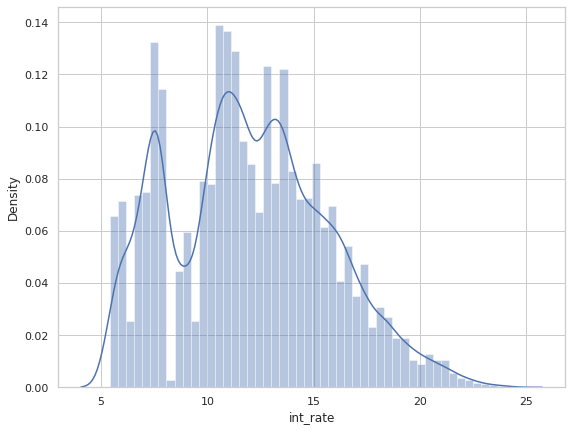

In [112]:
plt.figure(figsize=[20,7])
plt.subplot(1,2,1)
ax = sns.distplot(ploandata['int_rate'])
plt.show

In [113]:
ploandata.int_rate.describe()

count    36728.000000
mean        11.979958
std          3.701000
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [114]:
ploandata['int_rate'].quantile(0.95)

18.39

95% of the loans were issued with interest rate ~18.4% or below. Varied range between 9% to 14.5% given to most of the loans. 

In [115]:
ploandata.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5203.0,13.924515,3.656735,5.42,11.49,13.79,16.45,24.40
Fully Paid,31525.0,11.659022,3.608944,5.42,8.59,11.49,13.99,24.11


In general, it's safe to say that written off loans were generally assigned higher interest rates than fully paid off loans. Now let's see if the installments had any influence across these two categories.

In [116]:
ploandata.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5203.0,339.514809,215.843072,22.79,172.375,297.53,460.10,1305.19
Fully Paid,31525.0,322.616124,207.580732,16.08,167.080,278.17,424.56,1295.21


It's safe to say that the installment value generally had very limited influence on Charged Off or Fully Paid situation with the loan. The values appear close to draw a correlation from this data.

Now let's look at the grading system at Lending Club.

In [121]:
(ploandata.groupby('loan_status')['grade'].value_counts(normalize=True)*100).sort_index()

loan_status  grade
Charged Off  A        10.493946
             B        25.254661
             C        23.620988
             D        19.911589
             E        13.030944
             F         5.842783
             G         1.845089
Fully Paid   A        28.437748
             B        31.149881
             C        19.736717
             D        12.053925
             E         5.988898
             F         2.011102
             G         0.621729
Name: grade, dtype: float64

The grading system seems reasonably normal for the fully paid loans. However, looking at the Charged Off loans, we would normally expect a reverse trend. For a grading system to work properly it has to model both good and bad behavior. There is a bias for good behavior and hence it seems to hold true. Bad behavior modeling is poorly done - otherwise we wouldn't see a higher proportion of charged off loans in categories BCD relative to EAFG. 

Last thing, let's look at bankruptcies. 

In [124]:
ploandata.groupby('loan_status')['pub_rec_bankruptcies'].value_counts(normalize=True)*100

loan_status  pub_rec_bankruptcies
Charged Off  0.0                     93.638286
             1.0                      6.323275
             2.0                      0.038439
Fully Paid   0.0                     96.203013
             1.0                      3.787470
             2.0                      0.009516
Name: pub_rec_bankruptcies, dtype: float64

93% of the Charged Off loans had no history of bankruptcy. Only under 7% of the Charged Off loans had any history. So as such they cannot be a sole factor. It can be said that when you have a history of bankruptcy, it's highly likely the loan will be charged off / written off because we see a higher relative proportion (6.3 vs 3.8 and 0.04 vs 0.01) in those cases.

Now let's check if there is seasonality in a year on loan issuance.

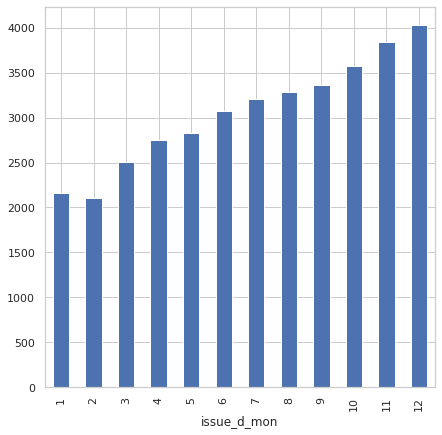

In [125]:
plt.figure(figsize=(7,7))
ax = ploandata.groupby('issue_d_mon').id.count().plot.bar()
plt.show()

This is a nearly linear trend from Jan to Dec. 

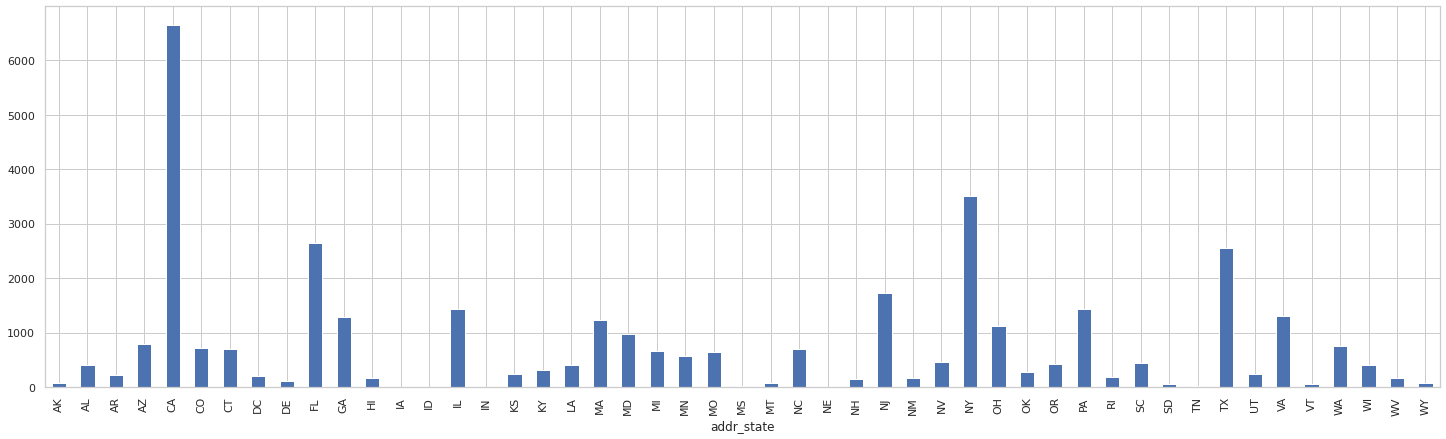

In [126]:
plt.figure(figsize=(25,7))
ax = ploandata.groupby('addr_state').id.count().plot.bar()
plt.show()

In [127]:
ploandata.groupby('loan_status')['addr_state'].value_counts(normalize=True)*100

loan_status  addr_state
Charged Off  CA            19.853930
             FL             8.821834
             NY             8.725735
             TX             5.669806
             NJ             5.112435
             GA             3.843936
             IL             3.632520
             VA             3.209687
             PA             3.190467
             MD             2.844513
             MA             2.825293
             OH             2.729195
             WA             2.229483
             AZ             2.171824
             MO             1.979627
             NC             1.941188
             NV             1.941188
             MI             1.806650
             CO             1.672112
             CT             1.652893
             MN             1.441476
             OR             1.306938
             SC             1.230060
             WI             1.114741
             LA             0.999423
             AL             0.941764
             K

California, Florida, New York - were the top 3 states in Charged Off Loans
California, New York, Texas - were the top 3 states in Fully Paid Loans

We completely missed out dti - Debt to income ratio. Let's create some categories for dti to analyze this further.

In [130]:
ploandata['dti_category'] = pd.cut(ploandata['dti'],[0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
ploandata.groupby('dti_category')['loan_status'].value_counts(normalize=True)*100

dti_category  loan_status
0-5           Fully Paid     88.068556
              Charged Off    11.931444
5-10          Fully Paid     87.719298
              Charged Off    12.280702
10-15         Fully Paid     85.811910
              Charged Off    14.188090
15-20         Fully Paid     84.667378
              Charged Off    15.332622
20-25         Fully Paid     83.552319
              Charged Off    16.447681
25-30         Fully Paid     86.744966
              Charged Off    13.255034
Name: loan_status, dtype: float64

Strangely - it's not a straightforward linear relationship. The 20-25 category has a higher % of charged off loans vs the 25-30 category. Overall though - subjectively it can be said the higher DTI - higher default probability.

Let's look at a bunch of these columns to see how they are correlated. 

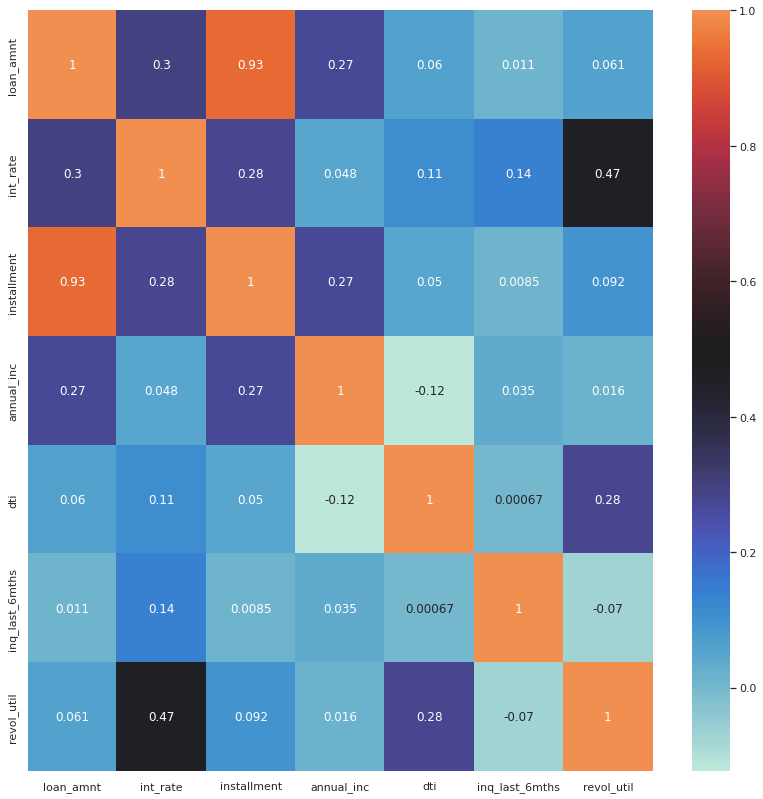

In [132]:
plt.figure(figsize=(14,14))
cont_var= ['loan_amnt', 'int_rate', 'installment','emp_length', 'annual_inc','dti', 'inq_last_6mths', 'revol_util']
corr = ploandata[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

Loan Amount is directly corelated to installment. Higher the loan, higher the installment. Straightforward. 
Higher the revolving utilization of credit - higher the interest rate as well as higher debt to income ratio.

Now let's look at delinquencies and how they spread across the grade and corresponding loan amounts.

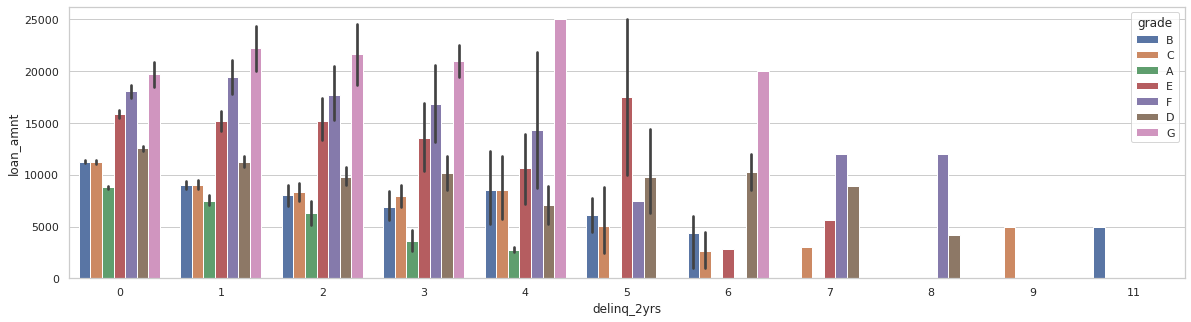

In [133]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=ploandata, estimator=np.mean)
plt.show()

Delinquencies greater than 3 - still have issued loan amounts greater than 10000. This is a significant risk and is also an indicator that this is not properly feeding the grading system. 

Another perspective of a similar spread now from a DTI category standpoint as well as grade. This time we are looking at the loan amount instead of number of loans. 

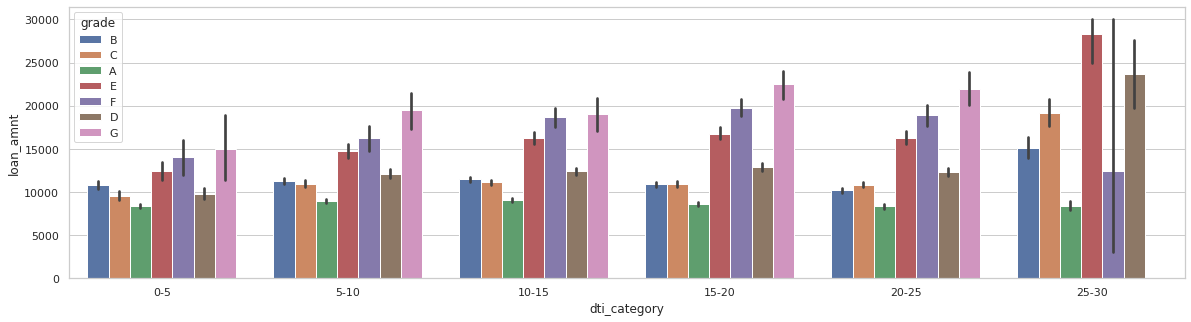

In [134]:
plt.figure(figsize=(20,5))
sns.barplot(x='dti_category', y='loan_amnt', hue='grade',data=ploandata, estimator=np.mean)
plt.show()

It's very evident that DTI is not being carefully evaluated before loan amounts are approved especially in the 15+ category. This needs to become an important variable. Let's look at this from another perspective: interest rates.

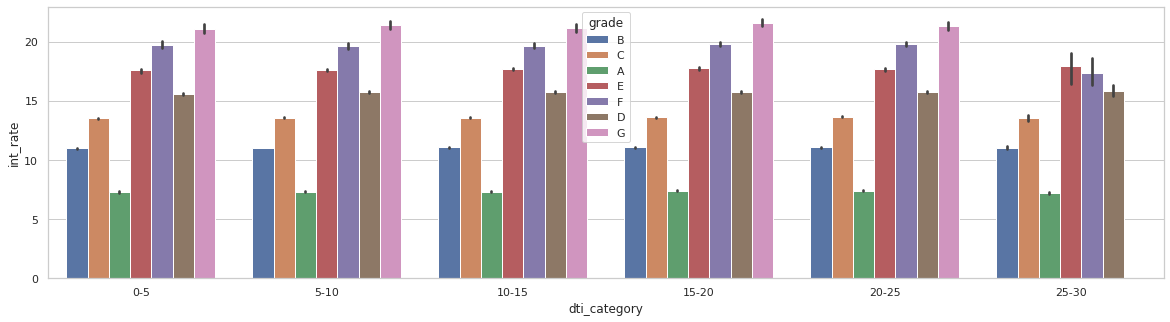

In [135]:
plt.figure(figsize=(20,5))
sns.barplot(x='dti_category', y='int_rate', hue='grade',data=ploandata, estimator=np.mean)
plt.show()

Grading system seems to influence the interest rates but the DTI category has no bearing on the interest rates or the grading system. It's safe to generalize that Grades A to G have lowest to highest interest rates regardless of DTI.

In [139]:
ploandata['loan_amnt_category'] = pd.cut(ploandata['loan_amnt'],[0,5000,7500,10000,12500,15000,17500,20000,30000,40000], labels=['0-5K','5-7.5K','7.5-10K','10-12.5K','12.5-15K','15-17.5K','17.5-20K','20-30K','30-40K'])
ploandata.groupby('loan_amnt_category')['loan_status'].value_counts(normalize=True)*100

loan_amnt_category  loan_status
0-5K                Fully Paid     86.840309
                    Charged Off    13.159691
5-7.5K              Fully Paid     88.334530
                    Charged Off    11.665470
7.5-10K             Fully Paid     86.797029
                    Charged Off    13.202971
10-12.5K            Fully Paid     87.149918
                    Charged Off    12.850082
12.5-15K            Fully Paid     86.129458
                    Charged Off    13.870542
15-17.5K            Fully Paid     81.966187
                    Charged Off    18.033813
17.5-20K            Fully Paid     83.609718
                    Charged Off    16.390282
20-30K              Fully Paid     81.171670
                    Charged Off    18.828330
30-40K              Fully Paid     75.938804
                    Charged Off    24.061196
Name: loan_status, dtype: float64

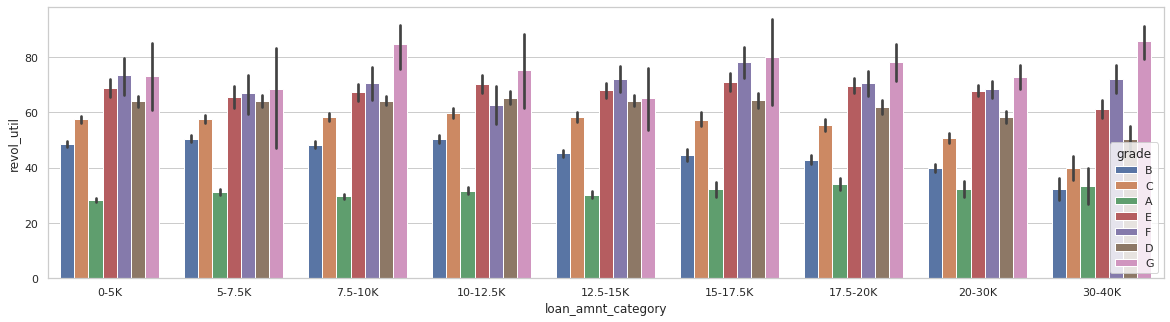

In [140]:
plt.figure(figsize=(20,5))
sns.barplot(x='loan_amnt_category', y='revol_util', hue='grade',data=ploandata, estimator=np.mean)
plt.show()

Across the plot as well as the table above, it is clear that when the revolving credit utilization is above 50% - higher loan amounts result in an increasing charged off situation.